In [ ]:
#For browsing
import os

#For data
import pandas as pd
import numpy as np
from collections import Counter, OrderedDict

#PCA
from sklearn.decomposition import PCA

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
from numpy import linalg

In [ ]:
data = pd.read_csv("data/VAA.csv")
data

,Unnamed: 0,Storkreds,Party,Name,Q1,Q2,Q3,Q4,Q5,Q6,...,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25
0,https://www.dr.dk/nyheder/politik/folketingsva...,Bornholms Storkreds,A: Socialdemokratiet,Lea Wermelin,Lidt enig,Lidt enig,Lidt enig,Uenig,Enig,Lidt uenig,...,Lidt enig,Lidt enig,Lidt enig,Enig,Enig,Uenig,Lidt enig,Lidt enig,Lidt enig,Lidt enig
1,https://www.dr.dk/nyheder/politik/folketingsva...,Bornholms Storkreds,A: Socialdemokratiet,Steen Frandsen,Lidt uenig,Lidt enig,Lidt enig,Uenig,Enig,Uenig,...,Uenig,Lidt uenig,Enig,Enig,Enig,Uenig,Enig,Lidt uenig,Lidt enig,Lidt enig
2,https://www.dr.dk/nyheder/politik/folketingsva...,Bornholms Storkreds,A: Socialdemokratiet,Lars Goldschmidt,Lidt enig,Lidt uenig,Lidt uenig,Uenig,Lidt enig,Lidt uenig,...,Lidt uenig,Uenig,Lidt enig,Lidt uenig,Lidt enig,Uenig,Lidt uenig,Lidt enig,Lidt enig,Lidt uenig
3,https://www.dr.dk/nyheder/politik/folketingsva...,Bornholms Storkreds,B: Radikale,Birger Nissen,Lidt enig,Lidt uenig,Uenig,Uenig,Enig,Lidt uenig,...,Enig,Uenig,Lidt enig,Uenig,Uenig,Lidt enig,Lidt enig,Enig,Enig,Lidt enig
4,https://www.dr.dk/nyheder/politik/folketingsva...,Bornholms Storkreds,B: Radikale,Niels Ebbesen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,https://www.dr.dk/nyheder/politik/folketingsva...,Østjyllands Storkreds,Å: Alternativet,Mads Damgaard Mortensen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,https://www.dr.dk/nyheder/politik/folketingsva...,Østjyllands Storkreds,Å: Alternativet,Thomas Due Nielsen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,https://www.dr.dk/nyheder/politik/folketingsva...,Østjyllands Storkreds,Å: Alternativet,Thor Clasen Jonasen,Lidt uenig,Enig,Uenig,Uenig,Uenig,Uenig,...,Enig,Uenig,Enig,Lidt uenig,Uenig,Enig,Lidt enig,Enig,Lidt enig,Lidt enig
1011,https://www.dr.dk/nyheder/politik/folketingsva...,Østjyllands Storkreds,: Uden for partierne,Jesper Antonsen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Clean "Uden for partierne"
data.replace({": Uden for partierne": "Uden for partierne"}, inplace= True)

In [ ]:
#Sort dataframe by party voted
order = {'A: Socialdemokratiet': 'A',
         'B: Radikale': 'B',
         'C: Konservative': 'C',
         'D: Nye Borgerlige': 'D',
         'F: SF': 'E',
         'I: Liberal Alliance': 'F',
         'K: Kristendemokraterne': 'G',
         'M: Moderaterne': 'H',
         'O: Dansk Folkeparti': 'I',
         'Q: Frie Grønne': 'J',
         'V: Venstre': 'K',
         'Æ: Danmarksdemokraterne': 'L',
         'Ø: Enhedslisten': 'M',
         'Å: Alternativet': 'N',
         'Jeg stemte ikke': 'O'}
 
data = data.sort_values(by='Party', key=lambda x: x.map(order))

In [ ]:
# Party colors for plotting
colours = { 'A: Socialdemokratiet':"#A82721",
            'B: Radikale':"#733280",
            'C: Konservative':"#96B226",
            'D: Nye Borgerlige':"#127B7F",
            'F: SF':"#E07EA8",
            'I: Liberal Alliance':"#3FB2BE",
            'K: Kristendemokraterne':"#8B8474",
            'M: Moderaterne':"#B48CD2",
            'O: Dansk Folkeparti':"#EAC73E",
            'Q: Frie Grønne':"#5ABE82",
            'V: Venstre':"#254264",
            'Æ: Danmarksdemokraterne':"#7896D2",
            'Ø: Enhedslisten':"#E6801A",
            'Å: Alternativet':"#2B8738",
            'Uden for partierne':"#000000"}

## How many candidates

In [ ]:
temp = data.copy()
print("Total number of candidates: ", temp.shape[0])
no_anwser = temp[temp["Q1"].notna()]
no_anwser_count = temp.shape[0]-no_anwser.shape[0]
print("Total number of candidates, that have no anwsers: ", no_anwser_count )
anwsered_all = no_anwser[no_anwser["Q25"].notna()]
print("Total number of candidates with more than 0 and less than 25 questions anwsered: ", temp.shape[0]-anwsered_all.shape[0]-no_anwser_count)
print("Total number of candidates with all 25 questions anwsered: ", anwsered_all.shape[0])

Total number of candidates:  1013
Total number of candidates, that have no anwsers:  110
Total number of candidates with more than 0 and less than 25 questions anwsered:  31
Total number of candidates with all 25 questions anwsered:  872


In [ ]:
#Drop na data
data = data.dropna()
data.shape

(872, 29)

/var/folders/dn/nd5kb8wx3xs44tlt7kst4n7h0000gn/T/ipykernel_6827/629303731.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


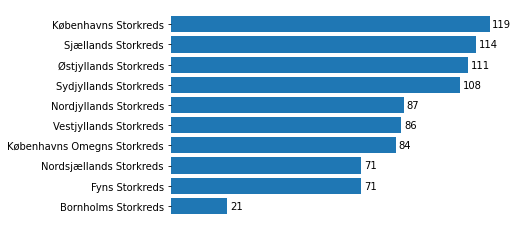

In [ ]:
# How many candidates for each of the Storkredse
a =OrderedDict(Counter(data["Storkreds"]).most_common()[::-1])
fig, ax = plt.subplots()
ax.barh(list(a.keys()),a.values())
for i, v in enumerate(a.values()):
    ax.text(v + 1, i- 0.15, str(v))
ax.set_frame_on(False)
ax.axes.get_xaxis().set_visible(False)
fig.show()

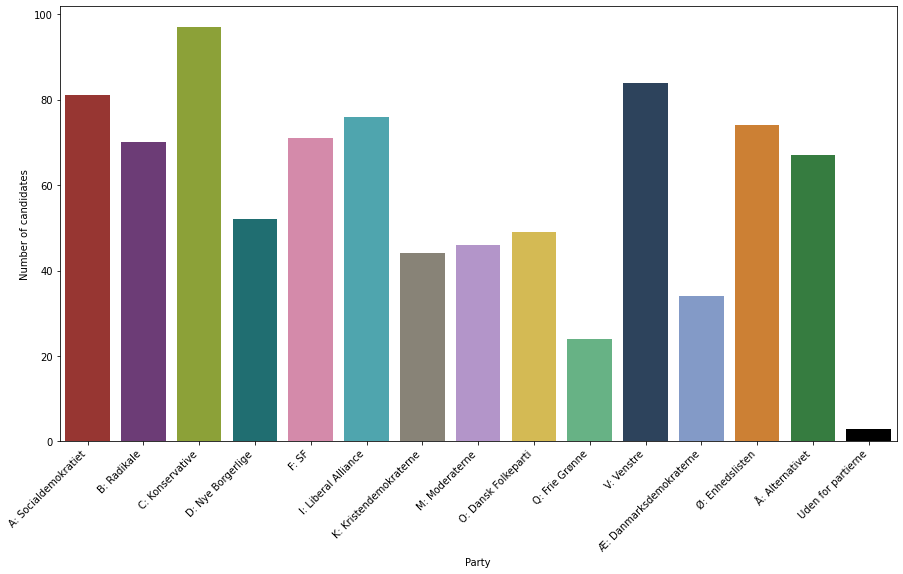

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=data, x="Party", palette= colours, )
ax.set(ylabel='Number of candidates')
plt.xticks(rotation=45, horizontalalignment = "right")
plt.savefig("EDA pics/number of candidates.png", dpi=300, bbox_inches='tight')

## What did the candidates answer

In [ ]:
qCol = [i for i in data.columns if 'Q' in i]

# Number of possible anwsers: Enig, lidt enig, lidt uenig, uenig
for i in qCol:
    if len(data.groupby(i).size()) < 4:
        print('Not all possible anwsers in: ' + i)

#Any total agreements or disagreements
temp = data.copy()
temp.drop(['Unnamed: 0', 'Storkreds', 'Party'], axis = 1, inplace= True)
temp = temp.transpose()
temp.columns = temp.iloc[0] #Names -> columns
temp = temp.tail(-1) #Drop first row
names = [i for i in temp.columns]
for i in names:
    print(temp[i].value_counts())

Lidt enig     16
Uenig          3
Enig           3
Lidt uenig     3
Name: Lea Wermelin, dtype: int64
Lidt enig     16
Lidt uenig     4
Enig           3
Uenig          2
Name: Jarl Feyling, dtype: int64
Lidt enig     17
Lidt uenig     6
Uenig          2
Name: Peter Hummelgaard, dtype: int64
Lidt enig     16
Uenig          3
Enig           3
Lidt uenig     3
Name: Jørgen Mørup Pedersen, dtype: int64
Lidt enig     8
Enig          7
Lidt uenig    7
Uenig         3
Name: Nikoline Prehn, dtype: int64
Lidt enig     15
Lidt uenig    10
Name: Lars Aslan Rasmussen, dtype: int64
Lidt uenig    10
Uenig          7
Lidt enig      6
Enig           2
Name: Mette Reissmann, dtype: int64
Lidt enig     15
Uenig          5
Enig           4
Lidt uenig     1
Name: Pernille Rosenkrantz-Theil, dtype: int64
Lidt enig     17
Lidt uenig     6
Uenig          1
Enig           1
Name: Halima El Abassi, dtype: int64
Lidt enig     11
Lidt uenig     7
Uenig          4
Enig           3
Name: Lars Werge, dtype: int64
Li

## PCA

In [ ]:
nn_data = data.dropna()
pca_features = nn_data.copy()
replacements = {
    "Lidt enig":1,
    "Enig":2,
    "Lidt uenig":-1,
    "Uenig":-2
}
pca_features.iloc[:,-25:] = pca_features.iloc[:,-25:].replace(replacements)
#pca_features.iloc[:,-25:] = (pca_features.iloc[:,-25:] - pca_features.iloc[:,-25:].mean()) / pca_features.iloc[:,-25:].std()
pca_features

,Unnamed: 0,Storkreds,Party,Name,Q1,Q2,Q3,Q4,Q5,Q6,...,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25
0,https://www.dr.dk/nyheder/politik/folketingsva...,Bornholms Storkreds,A: Socialdemokratiet,Lea Wermelin,1,1,1,-2,2,-1,...,1,1,1,2,2,-2,1,1,1,1
221,https://www.dr.dk/nyheder/politik/folketingsva...,Københavns Storkreds,A: Socialdemokratiet,Jarl Feyling,1,1,1,-2,2,-1,...,1,1,1,1,2,-2,1,2,1,1
222,https://www.dr.dk/nyheder/politik/folketingsva...,Københavns Storkreds,A: Socialdemokratiet,Peter Hummelgaard,1,1,1,-2,1,-1,...,-1,-1,1,1,1,-2,1,1,1,1
223,https://www.dr.dk/nyheder/politik/folketingsva...,Københavns Storkreds,A: Socialdemokratiet,Jørgen Mørup Pedersen,1,1,1,-2,2,-1,...,1,1,1,2,2,-2,1,1,1,1
224,https://www.dr.dk/nyheder/politik/folketingsva...,Københavns Storkreds,A: Socialdemokratiet,Nikoline Prehn,2,2,-1,-2,1,-1,...,2,-1,1,-2,-1,-2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,https://www.dr.dk/nyheder/politik/folketingsva...,Vestjyllands Storkreds,Å: Alternativet,Jørn Grønkjær,1,1,-1,-2,-1,-2,...,2,-2,2,-1,-2,-1,1,2,1,2
1010,https://www.dr.dk/nyheder/politik/folketingsva...,Østjyllands Storkreds,Å: Alternativet,Thor Clasen Jonasen,-1,2,-2,-2,-2,-2,...,2,-2,2,-1,-2,2,1,2,1,1
347,https://www.dr.dk/nyheder/politik/folketingsva...,Københavns Storkreds,Uden for partierne,Tom Gillesberg,1,1,-2,2,-2,1,...,1,-2,2,-2,-2,-1,1,-2,-1,-2
659,https://www.dr.dk/nyheder/politik/folketingsva...,Sjællands Storkreds,Uden for partierne,Rasmus Paludan,-2,-2,2,2,2,2,...,-2,2,-2,1,2,-1,-1,-2,-1,-2


In [ ]:
#Create PCA with two components
pca = PCA(n_components=2)
pca.fit(pca_features.iloc[:,-25:])
components = pca.components_

#Find the top three questions for each PCA
for i in range(len(components)):
    d = list(components[i])
    iSorted = sorted(d)
    first = qCol[d.index(iSorted[-1])]
    second = qCol[d.index(iSorted[-2])]
    third = qCol[d.index(iSorted[-3])]
    print('PCA', i+1,'',first, second, third)

PCA 1  Q2 Q16 Q9
PCA 2  Q17 Q19 Q4


In [ ]:
#Apply PCs to data
pr_comp = pd.DataFrame(pca.transform(pca_features.iloc[:,-25:]))
pr_comp = pr_comp.rename(columns={0: "PC1", 1: "PC2",2: "PC3", 3: "PC4",4:"PC5"})

print(pr_comp.shape)
print(nn_data.shape)

(872, 2)
(872, 29)


In [ ]:
#Create a dataframe with the PCs
data_pca = pd.concat([nn_data.reset_index(), pr_comp.reset_index()],axis = 1)
data_pca

,index,Unnamed: 0,Storkreds,Party,Name,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,index,PC1,PC2
0,0,https://www.dr.dk/nyheder/politik/folketingsva...,Bornholms Storkreds,A: Socialdemokratiet,Lea Wermelin,Lidt enig,Lidt enig,Lidt enig,Uenig,Enig,...,Enig,Enig,Uenig,Lidt enig,Lidt enig,Lidt enig,Lidt enig,0,1.714946,3.221982
1,221,https://www.dr.dk/nyheder/politik/folketingsva...,Københavns Storkreds,A: Socialdemokratiet,Jarl Feyling,Lidt enig,Lidt enig,Lidt enig,Uenig,Enig,...,Lidt enig,Enig,Uenig,Lidt enig,Enig,Lidt enig,Lidt enig,1,1.773889,2.531855
2,222,https://www.dr.dk/nyheder/politik/folketingsva...,Københavns Storkreds,A: Socialdemokratiet,Peter Hummelgaard,Lidt enig,Lidt enig,Lidt enig,Uenig,Lidt enig,...,Lidt enig,Lidt enig,Uenig,Lidt enig,Lidt enig,Lidt enig,Lidt enig,2,1.722742,1.643563
3,223,https://www.dr.dk/nyheder/politik/folketingsva...,Københavns Storkreds,A: Socialdemokratiet,Jørgen Mørup Pedersen,Lidt enig,Lidt enig,Lidt enig,Uenig,Enig,...,Enig,Enig,Uenig,Lidt enig,Lidt enig,Lidt enig,Lidt enig,3,1.714946,3.221982
4,224,https://www.dr.dk/nyheder/politik/folketingsva...,Københavns Storkreds,A: Socialdemokratiet,Nikoline Prehn,Enig,Enig,Lidt uenig,Uenig,Lidt enig,...,Uenig,Lidt uenig,Uenig,Lidt enig,Enig,Enig,Lidt enig,4,5.330406,-0.934235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,889,https://www.dr.dk/nyheder/politik/folketingsva...,Vestjyllands Storkreds,Å: Alternativet,Jørn Grønkjær,Lidt enig,Lidt enig,Lidt uenig,Uenig,Lidt uenig,...,Lidt uenig,Uenig,Lidt uenig,Lidt enig,Enig,Lidt enig,Enig,867,5.040838,-1.464590
868,1010,https://www.dr.dk/nyheder/politik/folketingsva...,Østjyllands Storkreds,Å: Alternativet,Thor Clasen Jonasen,Lidt uenig,Enig,Uenig,Uenig,Uenig,...,Lidt uenig,Uenig,Enig,Lidt enig,Enig,Lidt enig,Lidt enig,868,4.876179,-2.351526
869,347,https://www.dr.dk/nyheder/politik/folketingsva...,Københavns Storkreds,Uden for partierne,Tom Gillesberg,Lidt enig,Lidt enig,Uenig,Enig,Uenig,...,Uenig,Uenig,Lidt uenig,Lidt enig,Uenig,Lidt uenig,Uenig,869,1.030785,-1.012912
870,659,https://www.dr.dk/nyheder/politik/folketingsva...,Sjællands Storkreds,Uden for partierne,Rasmus Paludan,Uenig,Uenig,Enig,Enig,Enig,...,Lidt enig,Enig,Lidt uenig,Lidt uenig,Uenig,Lidt uenig,Uenig,870,-7.346156,3.036055


In [ ]:
ellipses = {} #key = party, value = [center, ellipse]
for i in set(data_pca['Party']):
    if i == 'Uden for partierne':
        pass
    else:
        #Get relevant data for the specific party
        temp = data_pca[(data_pca['Party'] == i)]
        a = np.array([temp['PC1'], temp['PC2']])

        #Get center of ellipse
        x_center = temp['PC1'].mean()
        y_center = temp['PC2'].mean()

        #Get Covarriance of the party
        cov_matrix = np.cov(a)
        eigenvalues, eigenvectors = linalg.eig(cov_matrix)
        
        #Compute the angle between the eigenvectors
        angle = np.degrees(np.arctan2(*eigenvectors[0]))

        #Get the color of the 
        color = colours[i]

        #Create ellipse
        ellipse = Ellipse(xy=(x_center, y_center), width=np.sqrt(eigenvalues[1]) * 2,
                    height=np.sqrt(eigenvalues[0]) * 2, angle = angle,
                    edgecolor=color, facecolor='none')
        ellipses[i] = [(x_center, y_center), ellipse]

In [ ]:
#Get the three most "saying" questions for each of the two PCA's
indexes = {}
for i in range(len(components)):
    d = list(components[i])
    iSorted = sorted(d)
    first = qCol[d.index(iSorted[-1])]
    second = qCol[d.index(iSorted[-2])]
    third = qCol[d.index(iSorted[-3])]
    #key = 'PCA'+str(i)
    indexes['PCA'+str(i)] = [d.index(iSorted[-1]), d.index(iSorted[-2]),d.index(iSorted[-3]) ]
    print('PCA', i+1,'',first, second, third)

#The magnitude of the question for that specific pca 
load = pca.components_.T * np.sqrt(pca.explained_variance_) #Eigenvectors * sqrt(eigenvalues)

PCA 1  Q2 Q16 Q9
PCA 2  Q17 Q19 Q4


/var/folders/dn/nd5kb8wx3xs44tlt7kst4n7h0000gn/T/ipykernel_6827/3411278737.py:25: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(qCol[i],
/var/folders/dn/nd5kb8wx3xs44tlt7kst4n7h0000gn/T/ipykernel_6827/3411278737.py:21: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(qCol[i],
/var/folders/dn/nd5kb8wx3xs44tlt7kst4n7h0000gn/T/ipykernel_6827/3411278737.py:15: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(qCol[i],


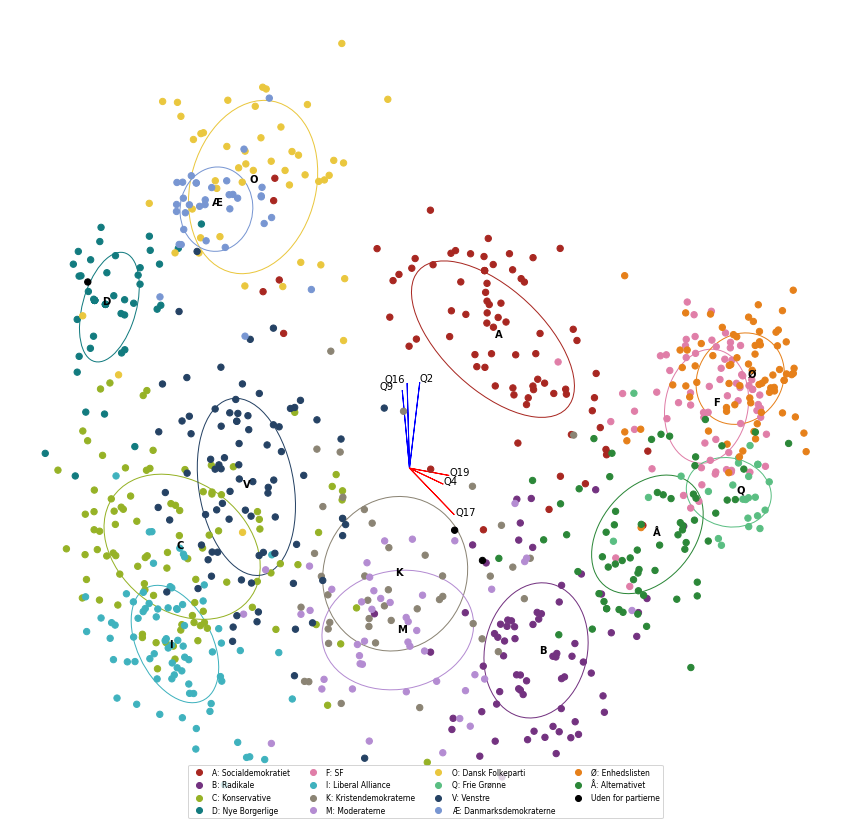

In [ ]:
fig, ax = plt.subplots()
for key, value in ellipses.items():
    ax.add_artist(value[1])

for key, value in indexes.items():
    for i in value:
        if key == 'PCA1':
            plt.arrow(0, 0, load[i,1], load[i,0], color = 'r')
            plt.annotate(qCol[i],
                xy=(load[i,1], load[i,0]),
                textcoords='offset points')
        else:
            plt.arrow(0, 0, load[i,1], load[i,0], color = 'b')
            if '9' in qCol[i] or '16' in qCol[i]:
                plt.annotate(qCol[i],
                    xy=(load[i,1]-0.5, load[i,0]),
                    textcoords='offset points')
            else:
                plt.annotate(qCol[i],
                    xy=(load[i,1], load[i,0]),
                    textcoords='offset points')

ax.axis('off')
ax.scatter(data_pca['PC1'], data_pca['PC2'],c = data_pca['Party'].replace(colours),s = 40);

#Add legend
markers = [plt.Line2D([0,0],[0,0],color = color, marker ='o', linestyle = '') for color in colours.values()]
plt.legend(markers, colours.keys(), numpoints = 1, ncol = 4, loc = 'lower center', fontsize="7.5", );

#Plot figure
fig.set_figheight(15)
fig.set_figwidth(15)
plt.savefig("EDA pics/PCA plot of candidates.png", dpi=300, bbox_inches='tight')

# Create the party mods

In [ ]:
party = data.drop(['Name', 'Storkreds', 'Unnamed: 0'], axis = 1)
party = party.groupby(['Party']).agg(lambda x: x.value_counts().index[0]).reset_index()
party.replace({'Uenig': -2, 'Lidt uenig': -1, 'Lidt enig': 1, 'Enig': 2}, inplace = True)
party.to_csv('data/PartyConverted.csv')